## Lecture de la table dynamique sur le site web

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import pandas as pd
import time
import numpy as np

#### Attention : il faut installer Selenium pour Python, et aussi avoir 'chromedriver.exe' sur son ordinateur (fichiers de téléchargement dispo ici => https://chromedriver.chromium.org/downloads) et reseigner le bon chemin d'accès dans la ligne n°8 du code ci-après.

In [4]:
options = webdriver.ChromeOptions()
# options.add_argument('--headless') # Si activé, n'ouvre pas la fenetre du navigateur
options.add_argument('--no-sandbox')
options.add_argument("start-maximized")
options.add_argument('--disable-dev-shm-usage')

# Initialisation du navigateur
wd = webdriver.Chrome(r'C:\Users\cchupin\chromedriver.exe',options=options)

# Chargement de la page
url = r"https://www.vigicrues.gouv.fr/niv3-station.php?CdEntVigiCru=27&CdStationHydro=S516001001&GrdSerie=H&ZoomInitial=1"
wd.get(url)
wd.maximize_window() # Affichage en plein ecran directement

time.sleep(4) # Temps d'attente pour que la page se charge complètement

# Recherche et sélection de l'onglet 'Observations'
WebDriverWait(wd, 20).until(EC.element_to_be_clickable((By.XPATH, "//li[@class='ui-state-default ui-corner-top'][contains(@aria-controls,'observations')]"))).click()

# Recuperation des données de la première page
html = wd.page_source
df = pd.read_html(html)[0]

# On recherche les éléments HTML correspondant aux numéros de page 
page_list = wd.find_elements(By.XPATH, "//li[@class='paginate_button ']/a")
total_page = np.arange(int(page_list[0].text), int(page_list[-1].text)+1,1)

# Boucle sur les numérors de pages pour concaténer les données
stop = False
while not stop :
    if int([p.text for p in page_list][-1]) == total_page[0]:
        stop = True
    for p in page_list:
        if int(p.text) == total_page[0]:
            print(f" .. Load page {p.text} / {total_page[-1]}", end='\r')
            total_page=total_page[1:]
            p.click()
            time.sleep(4) # Temps d'attente nécessaire pour le chargement de la page
            page_list = wd.find_elements(By.XPATH, "//li[@class='paginate_button ']/a")
            # Recupération des données
            html = wd.page_source
            df = pd.concat((df, pd.read_html(html)[0]), ignore_index=True)
            break

wd.quit()

C:\Users\ltestut\AppData\Local\Temp\ipykernel_20448\2395133896.py:8: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome(r'C:\Users\cchupin\chromedriver.exe',options=options)


WebDriverException: Message: 'chromedriver.exe' executable needs to be in PATH. Please see https://chromedriver.chromium.org/home


In [92]:
df

Date et heure locale  Ciboure (Nivelle)
0        08/12/2021 09:50                353
1        08/12/2021 09:45                356
2        08/12/2021 09:40                359
3        08/12/2021 09:35                368
4        08/12/2021 09:30                380
...                   ...                ...
1460     07/11/2021 05:00                440
1461     07/11/2021 04:00                382
1462     07/11/2021 03:00                284
1463     07/11/2021 02:00                186
1464     07/11/2021 01:05                108

[1465 rows x 2 columns]

In [88]:
ciboure = pd.DataFrame(data={'heights':df['Ciboure (Nivelle)']/100.}).set_index(pd.DatetimeIndex(df['Date et heure locale'], dayfirst=True))

<AxesSubplot:xlabel='Date et heure locale'>

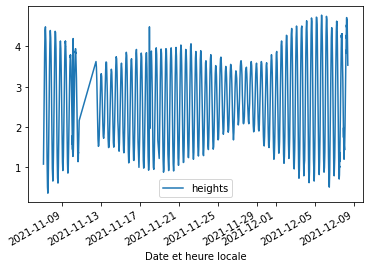

In [95]:
ciboure.plot()

In [91]:
ciboure.to_csv('ciboure_station.csv')